In [100]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import time
import random

In [101]:
from scipy.stats import linregress
from citipy import citipy
from config import WeatherKey
from config import Gkey

In [102]:
#Save a CSV of all retrieved data
output_data_file = "output_data/cities.csv"

In [124]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# create geolocations using random 
randlats = np.random.uniform(low=-90, high=90, size=2000)
randlngs = np.random.uniform(low=-180, high=180, size=2000)
lat_lngs = zip(randlats, randlngs)

In [125]:
# search nearest city for geolocations
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
#cities

In [126]:
#Perform a weather check on each of the cities using a series of successive API calls
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
query_url = url + WeatherKey
query_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=22718cda46e6e46b3e5a8bddd254eabf'

In [127]:
# weather lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind_speed = []
city_number = 0

In [128]:
#query for weather info 
for city in cities:
    weather_response = requests.get(query_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        city_name.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        
        #print a log of each city as it's being processed with the city number and city name
        city_number = city_number + 1
        print(f"Processing city number {city_number} - {city}")
    except:
        print("data not found - skipping") 
        pass
        
print("Query Completed")

Processing city number 1 - mataura
Processing city number 2 - ushuaia
Processing city number 3 - sun city west
Processing city number 4 - hasaki
Processing city number 5 - ribeira grande
Processing city number 6 - butaritari
Processing city number 7 - sangar
Processing city number 8 - tezu
Processing city number 9 - bilibino
Processing city number 10 - punta arenas
Processing city number 11 - okhotsk
Processing city number 12 - mar del plata
Processing city number 13 - albany
Processing city number 14 - uige
Processing city number 15 - pevek
Processing city number 16 - bredasdorp
Processing city number 17 - airai
Processing city number 18 - qaanaaq
Processing city number 19 - nong bua
Processing city number 20 - sarangani
Processing city number 21 - upernavik
Processing city number 22 - new norfolk
Processing city number 23 - aleksandrov gay
data not found - skipping
Processing city number 24 - busselton
Processing city number 25 - nikolskoye
Processing city number 26 - staryy oskol
Pr

Processing city number 203 - high level
Processing city number 204 - novobirilyussy
Processing city number 205 - meulaboh
Processing city number 206 - kiunga
Processing city number 207 - arraial do cabo
Processing city number 208 - saint-augustin
Processing city number 209 - kirakira
Processing city number 210 - yar-sale
Processing city number 211 - dunedin
Processing city number 212 - lishu
Processing city number 213 - lebu
Processing city number 214 - porto santo
Processing city number 215 - santa cruz
Processing city number 216 - noumea
Processing city number 217 - torbay
Processing city number 218 - kenora
Processing city number 219 - morondava
Processing city number 220 - katsina
Processing city number 221 - vardo
Processing city number 222 - tamandare
Processing city number 223 - coronel bogado
Processing city number 224 - namatanai
Processing city number 225 - lorengau
Processing city number 226 - maniitsoq
Processing city number 227 - saint george
Processing city number 228 - t

Processing city number 407 - praia da vitoria
Processing city number 408 - fernie
Processing city number 409 - aasiaat
Processing city number 410 - nevsehir
Processing city number 411 - raga
Processing city number 412 - owando
data not found - skipping
Processing city number 413 - bayan
Processing city number 414 - yushan
Processing city number 415 - caravelas
Processing city number 416 - saint-francois
Processing city number 417 - port-gentil
Processing city number 418 - nhulunbuy
Processing city number 419 - torres
Processing city number 420 - mitsamiouli
Processing city number 421 - coquimbo
Processing city number 422 - saint-pierre
Processing city number 423 - mecca
Processing city number 424 - alappuzha
Processing city number 425 - humberto de campos
Processing city number 426 - titay
Processing city number 427 - gazli
Processing city number 428 - novocheremshansk
Processing city number 429 - colares
Processing city number 430 - kaitangata
Processing city number 431 - disna
Proces

Processing city number 608 - katherine
Processing city number 609 - choctaw
Processing city number 610 - vestmanna
Processing city number 611 - inuvik
Processing city number 612 - iracoubo
Processing city number 613 - kalmunai
Processing city number 614 - nurota
Processing city number 615 - san cristobal
Processing city number 616 - hrubieszow
Processing city number 617 - kajaani
Processing city number 618 - zelenoborsk
data not found - skipping
Processing city number 619 - evensk
data not found - skipping
Processing city number 620 - cabra
Processing city number 621 - salinas
Processing city number 622 - eureka
Processing city number 623 - thoen
Processing city number 624 - izazi
Processing city number 625 - oktyabrskoye
Processing city number 626 - nikel
Processing city number 627 - middlebury
Processing city number 628 - eyemouth
Processing city number 629 - san matias
Processing city number 630 - lagos
Processing city number 631 - ligayan
data not found - skipping
Processing city n

In [108]:
#debug array must be all same length error
#len(city_name)
len(cloudiness)
#len(country)
#len(date)
#len(humidity)
#len(lat)
#len(lng)
#len(temp)
#len(wind_speed)

127

In [163]:
# create dictonary 
weather_dict = {"city": city_name,
                "latitude": lat,
                "longitude":lng,
                "temperature":temp,
                "humidity":humidity,
                "cloudiness":cloudiness,
                "wind speed":wind_speed,
                "country":country}
#creat dataframe
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

city           683
latitude       683
longitude      683
temperature    683
humidity       683
cloudiness     683
wind speed     683
country        683
dtype: int64

In [164]:
# Export the City_Data into a csv
weather_data.to_csv(r'output data\weather_output.csv')


In [142]:
weather_data.head()

,city,latitude,longitude,temperature,humidity,cloudiness,wind speed,country
0,Mataura,-46.1927,168.8643,46.27,73,5,2.71,NZ
1,Ushuaia,-54.8000,-68.3000,30.94,91,77,3.49,AR
2,Sun City West,33.6620,-112.3413,98.29,19,4,2.73,US
3,Hasaki,35.7333,140.8333,84.45,71,87,22.86,JP
4,Ribeira Grande,38.5167,-28.7000,73.02,91,11,3.06,PT


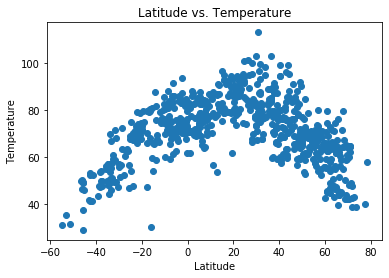

In [143]:
# scatter plot for latitude vs. temperature
scatlat = weather_data["latitude"]
ScatTemp = weather_data["temperature"]

plt.scatter(scatlat,ScatTemp)
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('ScatPlot_lat_temp')
plt.show()

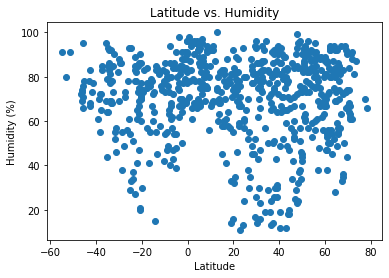

In [136]:
#Humidity (%) vs. Latitude
ScatHumid = weather_data["humidity"]

plt.scatter(scatlat,ScatHumid)
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('ScatPlot_lat_humid')
plt.show()

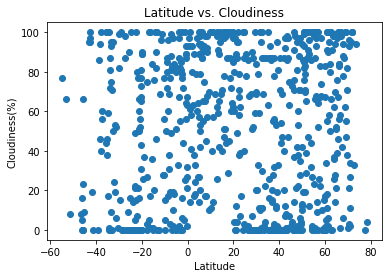

In [137]:
#Cloudiness (%) vs. Latitude
ScatCloud = weather_data["cloudiness"]

plt.scatter(scatlat,ScatCloud)
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig('ScatPlot_lat_cloud')
plt.show()

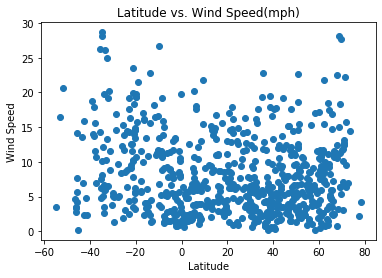

In [138]:
#Wind Speed (mph) vs. Latitude
ScatWind = weather_data["wind speed"]

plt.scatter(scatlat,ScatWind)
plt.title('Latitude vs. Wind Speed(mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('ScatPlot_lat_wind')
plt.show()


# Linear Regression Modeling

In the following linear regresion models, the analysis will take a closer look at the data based on hemisphere in order to explore what the weather around the equator (latitude 0) has historically been. 

In [144]:
# run linear regression on each relationship
NorthHem_df = weather_data.loc[weather_data['latitude']>=0]
SouthHem_df = weather_data.loc[weather_data['latitude']<0]
SouthHem_df.head()

,city,latitude,longitude,temperature,humidity,cloudiness,wind speed,country
0,Mataura,-46.1927,168.8643,46.27,73,5,2.71,NZ
1,Ushuaia,-54.8000,-68.3000,30.94,91,77,3.49,AR
9,Punta Arenas,-53.1500,-70.9167,35.11,80,66,16.53,CL
11,Mar del Plata,-38.0023,-57.5575,49.53,72,100,15.55,AR
13,Uíge,-7.6087,15.0613,59.27,86,77,2.26,AO


The r-squared is: 0.3675009530415881


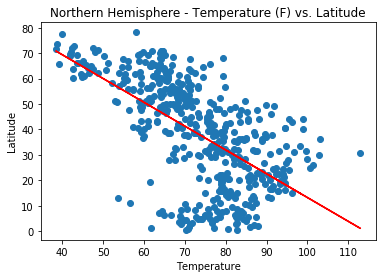

The r-squared is: 0.6201678699894937


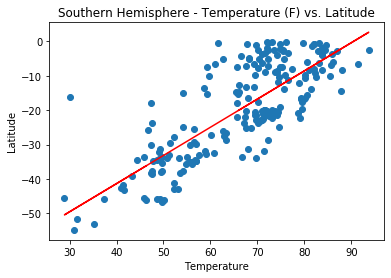

In [159]:
# Northern Hemisphere - Temperature (F) vs. Latitude
x_values = NorthHem_df['temperature']
y_values = NorthHem_df['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('NorthHemRegessPlot_temp_lat')
plt.show()

# Southern Hemisphere - Temperature (F) vs. Latitude
x_values = SouthHem_df['temperature']
y_values = SouthHem_df['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('SouthHemRegessPlot_temp_lat')
plt.show()

In the regression models comparing temperature and latitude, there is significant correlation between distance to the equator and max tempature. So, we can say with high reliabiliaty that the weather gets hotter the closer to the equation.

The r-squared is: 0.005543276097504435


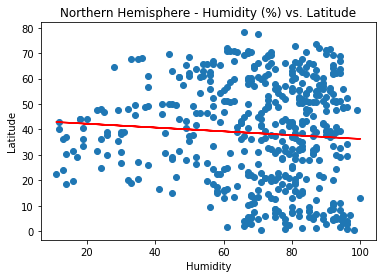

The r-squared is: 0.00012775881705205856


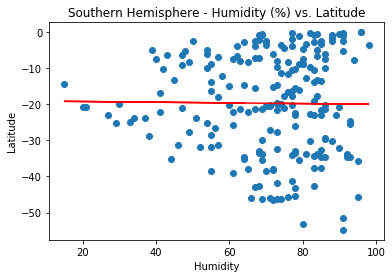

In [160]:
# Northern Hemisphere - Humidity (%) vs. Latitude
x_values = NorthHem_df['humidity']
y_values = NorthHem_df['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('NorthHemRegessPlot_hum_lat')
plt.show()

# Southern Hemisphere - Humidity (%) vs. Latitude
x_values = SouthHem_df['humidity']
y_values = SouthHem_df['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('SouthHemRegessPlot_hum_lat')
plt.show()

In analysing the relationship between humidity and latitude in both the south and north hemisphere, it can be concluded that their is no siginficant trelationship between humidity and distance from the equator.

The r-squared is: 0.009542621908119152


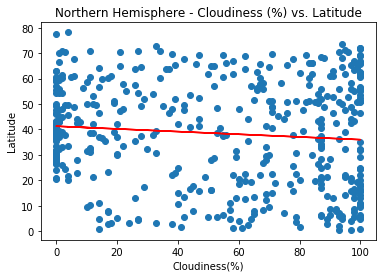

The r-squared is: 0.006145386521615433


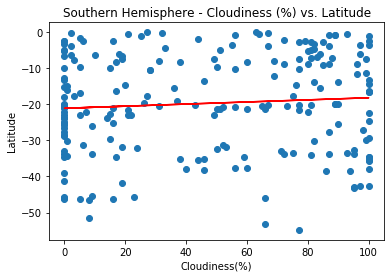

In [161]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = NorthHem_df['cloudiness']
y_values = NorthHem_df['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Cloudiness(%)')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('NorthHemRegessPlot_cloud_lat')
plt.show()

# Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = SouthHem_df['cloudiness']
y_values = SouthHem_df['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Cloudiness(%)')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('SouthHemRegessPlot_cloud_lat')
plt.show()

In analysing the relationship between cloudiness and latitude in both the south and north hemisphere, it can be concluded that their is no siginficant relationship between cloudiness and distance from the equator.

The r-squared is: 0.014207938613427925


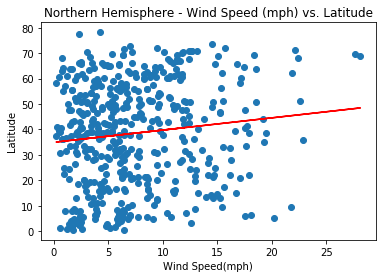

The r-squared is: 0.03835069952319841


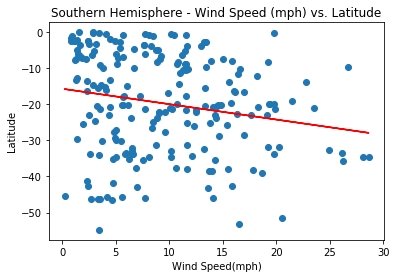

In [162]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = NorthHem_df['wind speed']
y_values = NorthHem_df['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Wind Speed(mph)')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('NorthHemRegessPlot_wind_lat')
plt.show()

# Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = SouthHem_df['wind speed']
y_values = SouthHem_df['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Wind Speed(mph)')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('SouthHemRegessPlot_wind_lat')
plt.show()

In analysing the relationship between wind speed and latitude in both the south and north hemisphere, it can be concluded that their is no siginficant relationship between wind speed and distance from the equator.

# on to VacationPy!